In [1]:
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interactive, interact_manual
from putils import *

# Oscilador armonico
Sistema lineal que depende se un solo parametro K

In [2]:
# Oscilador simple
def osc_harm(t, x, K):
    return [
        x[1],
        -K*x[0],
    ]

## Calculo de las trayectorias
Para resolver (integrar) usamos la funcion **solve_plot** de putils

**solve_plot** necesita como argumentos:
1. la funcion que define el sistema dinamico (en este caso osc_harm)
2. los parametros del sistema como un diccionario 'nombre':valor
3. la condicion inicial como un array [x0,x1] en nuestro caso
4. el tiempo maximo
5. (opcional) el paso de integracion

Para facilitar esto definimos una funcion ad-hoc que despues vamos a poder hacer interactiva

In [3]:
# armamos trayectoria de entrenamiento partiendo de (0.1, 0)
def solve_osc_harm(K,x0,x1,tmax):
    dt = 0.001
    par={'K':K}
    return solve_plot(osc_harm,par,[x0,x1],tmax,dt)

## Evolucion temporal y Retrato de fases
Podemos graficar la solucion del sistema y el retrato de fases para un valor particular del parametro y de la condicion inicial

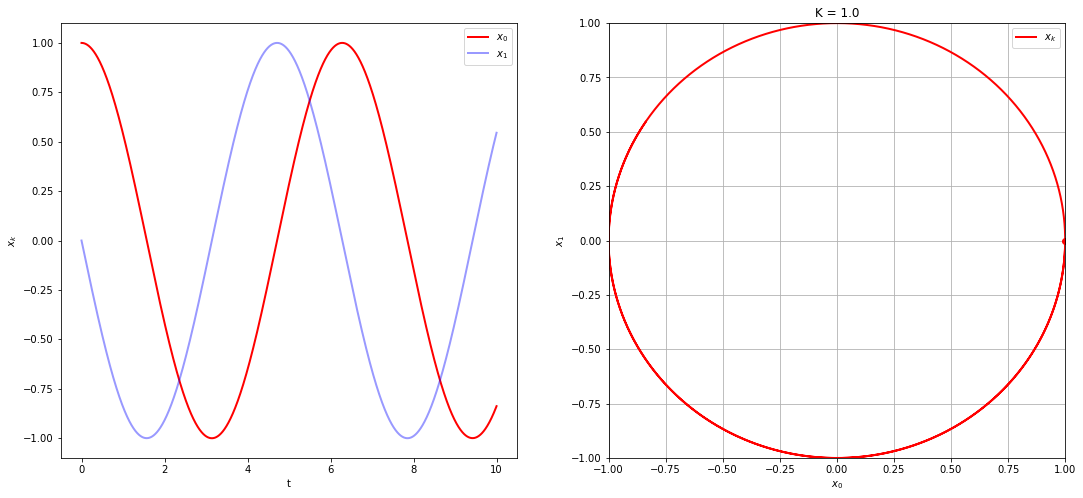

In [4]:
solve_osc_harm(1.0,1.0,0,10)

## Interaccion
usando el ipywidget interactive podemos darle un rango al parametro, la condicion incial y el tiempo maximo de integracion y jugar con eso de forma interactiva 

In [5]:
iplot0 = interactive(solve_osc_harm,
                    K=(0,2.0,0.01),
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    tmax=(1,30,1))

In [6]:
iplot0

interactive(children=(FloatSlider(value=1.0, description='K', max=2.0, step=0.01), FloatSlider(value=0.0, desc…

 # Bouncing Ball
    
Una bola bajo la accion de la gravedad **G** para x>0 y que rebota con un resorte que ejerce fuerza de parametro **K** para x<0

In [7]:
def osc_bounce(t, x, K,G):
    if (x[0]>0):
        return [
            x[1],
            -G,
        ]
    else:
        return [
            x[1],
            -G-K*x[0],
        ]

In [8]:
def solve_osc_bounce(K,G,x0,x1,tmax):
    dt = 0.0001
    par={'K':K,'G':G}
    return solve_plot(osc_bounce,par,[x0,x1],tmax,dt)

In [9]:
iplot1 = interactive(solve_osc_bounce,
                    K=(0,300.0,0.01),
                    G=(0,1,0.01), 
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    tmax=(1,20,1))

In [10]:
iplot1

interactive(children=(FloatSlider(value=150.0, description='K', max=300.0, step=0.01), FloatSlider(value=0.0, …

# Bouncing Ball con disipacion
Ahora aparece una fuerza de friccion que depende de la velocidad controlada por un parametro C

In [11]:
def osc_bounce2(t,x,K,G,C):
    if (x[0]>0):
        return [
            x[1],
            -G-C*x[1],
        ]
    else:
        return [
            x[1],
            -G-C*x[1]-K*x[0],
        ]

In [12]:
def solve_osc_bounce2(K,G,C,x0,x1,tmax):
    dt = 0.0001
    par={'K':K,'G':G,'C':C}
    return solve_plot(osc_bounce2,par,[x0,x1],tmax,dt)

iplot2 = interactive(solve_osc_bounce2,
                    K=(0,300.0,0.01),
                    G=(0,1,0.01), 
                    C=(0,0.5,0.01), 
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    tmax=(1,20,1))

iplot2

interactive(children=(FloatSlider(value=150.0, description='K', max=300.0, step=0.01), FloatSlider(value=0.0, …

# Oscilador armonico con disipacion

En este caso tambien actua la friccion que depende de la velocidad y depende del parametro C

In [13]:
def osc_harm2(t, x, K, C):
    return [
        x[1],
        -K*x[0]-C*x[1],
    ]

In [14]:
def solve_osc_harm2(K,C,x0,x1,tmax):
    dt = 0.0001
    par={'K':K,'C':C}
    return solve_plot(osc_harm2,par,[x0,x1],tmax,dt)

iplot3 = interactive(solve_osc_harm2,
                    K=(0,1.0,0.01),
                    C=(0,0.5,0.01), 
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    tmax=(1,20,1))

iplot3

interactive(children=(FloatSlider(value=0.5, description='K', max=1.0, step=0.01), FloatSlider(value=0.25, des…

# Oscilador No Lineal : Van der Pol
En este caso el termino de disipacion es no lineal y en lugar de C es igual a $C(x^2-1)$
de forma tal que cuando x es menor que 1 la disipacion es **negativa** y actua como una fuente de energia

In [4]:
def van_der_pol(t, x, K, C):
    return [
        x[1],
        -K*x[0]-C*x[1]*(x[0]*x[0]-1),
    ]
    

In [19]:
def solve_van_der_pol(K,C,x0,x1,tmax):
    dt = 0.0001
    par={'K':K,'C':C}
    return solve_plot(van_der_pol,par,[x0,x1],tmax,dt,ranges=[[-3,3],[-5,5]])

iplot4 = interactive(solve_van_der_pol,
                    K=(0,1.0,0.01),
                    C=(0,3.0,0.01), 
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    tmax=(1,100,1))

iplot4

interactive(children=(FloatSlider(value=0.5, description='K', max=1.0, step=0.01), FloatSlider(value=1.5, desc…

# Analisis armonico

In [9]:
def solve_van_der_pol_fft(K,C,x0,x1,tmax,fmax):
    dt = 0.0001
    par={'K':K,'C':C}
    return solve_plot(van_der_pol,par,[x0,x1],tmax,dt,ranges=[[-3,3],[-8,8]],fmax=fmax,wfft=True)


5000.0


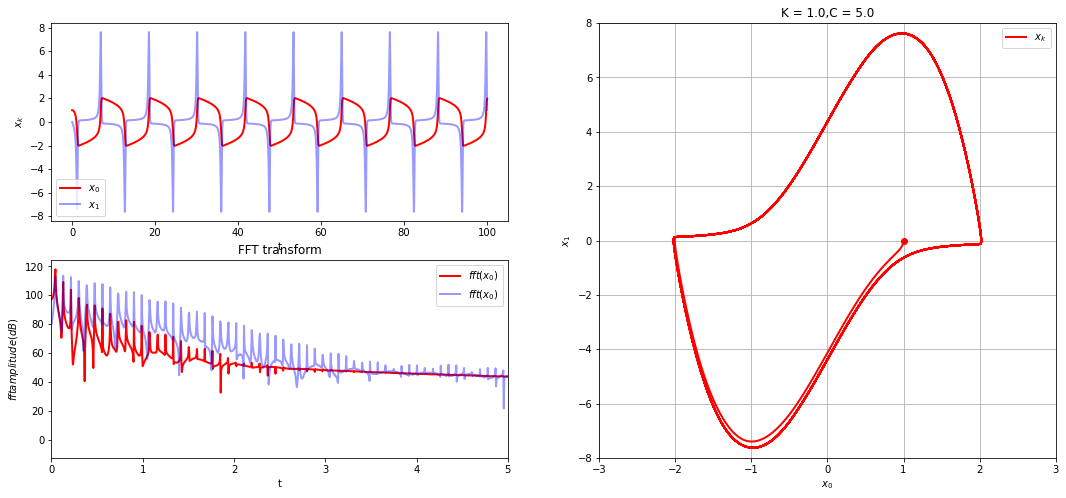

In [10]:
solve_van_der_pol_fft(1.0,5.0,1,0,100,5)

In [11]:
iplot5 = interact_manual(solve_van_der_pol_fft,
                    K=(0,1.0,0.01),
                    C=(0,5.0,0.01), 
                    x0=(-1,1,0.01),
                    x1=(-1,1,0.01),
                    tmax=(1,100,1),
                    fmax=(1,10,0.1),)


interactive(children=(FloatSlider(value=0.5, description='K', max=1.0, step=0.01), FloatSlider(value=2.5, desc…